# Final Project
Dataset             :  Bank marketing campaigns dataset | Opening Deposit </br>
Disusun Oleh    :  Roberto Benedict & Gretty Margaretha</br>
Kelas                 :  JCDSOL-013(B)

## A. Business Problem Understanding

**Context :**  
Bank marketing campaigns dataset analysis - Opening a Term Deposit dataset is a dataset describing a Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.

If after all marketing efforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Target y (term): 

* 0 : no, disagree to place deposit
* 1 : yes, agree to place deposit

**Problem Statement :**

The marketing process can consume significant time and resources if the bank targets all potential clients without prior filtering or targeted marketing, resulting in wasted time and resources. The bank wants to increase marketing efficiency by identifying which potential clients are likely to agree to open a term deposit account.

**Goals :**
1. Identify client feature patterns for the most probable potential clients:
    * Most important features correlated with the target
    * Seasonality
    * Socio-economic conditions
2. Minimize promotion costs

Based on these issues, the bank aims to predict the likelihood of a client agreeing to open a term deposit account. This can support the bank in executing marketing strategies focused on clients most likely to be interested, thereby saving costs, time, and resources.

Additionally, the bank wants to understand the factors influencing a client's decision to open a term deposit account or not, enabling them to develop better plans for approaching potential clients.

**Analytic Approach :**

Our approach will involve analyzing the data to discover patterns that distinguish clients who are likely to open a term deposit account from those who are not. 

Then, a classification model will be developed to help the bank predict the probability of a client wanting to open a term deposit account.

**Metric Evaluation :**

![img](Image/confusion_matrix.png)

* **Type I error (False Positive)** : Predicting a client will open a term deposit when they actually won't  
  **Consequence**: Wasted resources, time, and costs due to targeting uninterested clients.

* **Type II error (False Negative)** : Predicting a client won't open a term deposit when they actually will  
  **Consequence**: Losing potential clients who might have opened a term deposit.

Given these consequences, it is crucial to develop a model that minimizes promotion costs for the company without increasing the number of missed opportunities (false negatives). Therefore, we aim for as many correct positive predictions as possible while reducing false negatives, and also considering false positives to avoid wasted expenses. Based on these considerations, the primary metric to use will be chosen between the **F2-score** or **ROC-AUC**.

**Library**

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## B. Data Understanding

Dataset source : [bank-additional-full.csv](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/data)

Note : 
- Regarding missing Attribute Values, there are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

### Attribute Information

**Bank Client Data**
| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| age | numeric | Ratio | Age of the client |
| job | categorical | Nominal | Type of job (e.g., "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") |
| marital | categorical | Nominal | Marital status (e.g., "divorced","married","single","unknown") |
| education | categorical | Nominal | Education level (e.g., "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") |
| default | categorical | Nominal | Has credit in default? (e.g., "no","yes","unknown") |
| housing | categorical | Nominal | Has housing loan? (e.g., "no","yes","unknown") |
| loan | categorical | Nominal | Has personal loan? (e.g., "no","yes","unknown") |

**Campaign Details**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| contact | categorical | Nominal | Contact communication type (e.g., "cellular","telephone") |
| month | categorical | Nominal | Last contact month of year (e.g., "jan", "feb", "mar", …, "nov", "dec") |
| day_of_week | categorical | Nominal | Last contact day of the week (e.g., "mon","tue","wed","thu","fri") |
| duration | numeric | Ratio | Last contact duration, in seconds |
| campaign | numeric | Ratio | Number of contacts performed during this campaign and for this client |
| pdays | numeric | Ratio | Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | numeric | Ratio | Number of contacts performed before this campaign and for this client |
| poutcome | categorical | Nominal | Outcome of the previous marketing campaign (e.g., "failure","nonexistent","success") |

**Social and Economic Context Attributes**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| emp.var.rate | numeric | Ratio | Employment variation rate - quarterly indicator |
| cons.price.idx | numeric | Ratio | Consumer price index - monthly indicator |
| cons.conf.idx | numeric | Ratio | Consumer confidence index - monthly indicator |
| euribor3m | numeric | Ratio | Euribor 3 month rate - daily indicator |
| nr.employed | numeric | Ratio | Number of employees - quarterly indicator |

**Output Variable**

| Attribute | Data Type (Dtype) | Data Type (Levels of Measurement) | Description |
| --- | --- | --- | --- |
| y | binary | Nominal | Has the client subscribed a term deposit? (e.g., "yes","no") |


In [6]:
dataset = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [7]:
df = dataset.copy()

In [8]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,object,0,0.0,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,object,0,0.0,4,"[married, single, divorced, unknown]"
3,education,object,0,0.0,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,object,0,0.0,3,"[no, unknown, yes]"
5,housing,object,0,0.0,3,"[no, yes, unknown]"
6,loan,object,0,0.0,3,"[no, yes, unknown]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,object,0,0.0,5,"[mon, tue, wed, thu, fri]"


## C. Data Cleaning

### Missing Values

In [11]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Duplicated

In [12]:
print(f'Duplicated : {df.duplicated().sum()}')
print(f'Percent Duplicated : {round(df.duplicated().sum()/len(df)*100,2)} %')

Duplicated : 12
Percent Duplicated : 0.03 %


In [13]:
dupSuspect = df.duplicated(keep=False)

In [14]:
dfCheck = df[dupSuspect].sort_values(by=list(df.columns),axis=0)
display(dfCheck.head(2),dfCheck.tail(2))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38255,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no
38281,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [15]:
df = df.drop_duplicates()

### Handling Unknown

In [16]:
listItem = []
for col_name in df.columns:
    listItem.append([col_name, f"{len(df[df[col_name]=='unknown'])} of {len(df)}", f"{round(len(df[df[col_name]=='unknown'])/len(df)*100,2)} %"
    ])

dfUnknown = pd.DataFrame(columns=['Column Name', 'Unknown Count', 'Unknown Percentage'], data=listItem)
dfUnknown

,Column Name,Unknown Count,Unknown Percentage
0,age,0 of 41176,0.0 %
1,job,330 of 41176,0.8 %
2,marital,80 of 41176,0.19 %
3,education,1730 of 41176,4.2 %
4,default,8596 of 41176,20.88 %
5,housing,990 of 41176,2.4 %
6,loan,990 of 41176,2.4 %
7,contact,0 of 41176,0.0 %
8,month,0 of 41176,0.0 %
9,day_of_week,0 of 41176,0.0 %


1. `Job` : Could be dropped
2. `Marital` : Could be dropped
3. `Education` : Could be dropped
4. `Default` : Not dropped, could imply no prior credit history
5. `Housing` : Could be dropped
6. `Loan` : Could be dropped

In [17]:
col_select = ['job','marital','education','housing','loan']
prevLen = len(df)
df = df[~df[col_select].isin(['unknown']).any(axis=1)]
print(f"Removed rows : {prevLen-len(df)}")
print(f"Removed rows Percentage : {round((prevLen-len(df))/prevLen*100,2)} %")

Removed rows : 2942
Removed rows Percentage : 7.14 %


### Handling Outliers

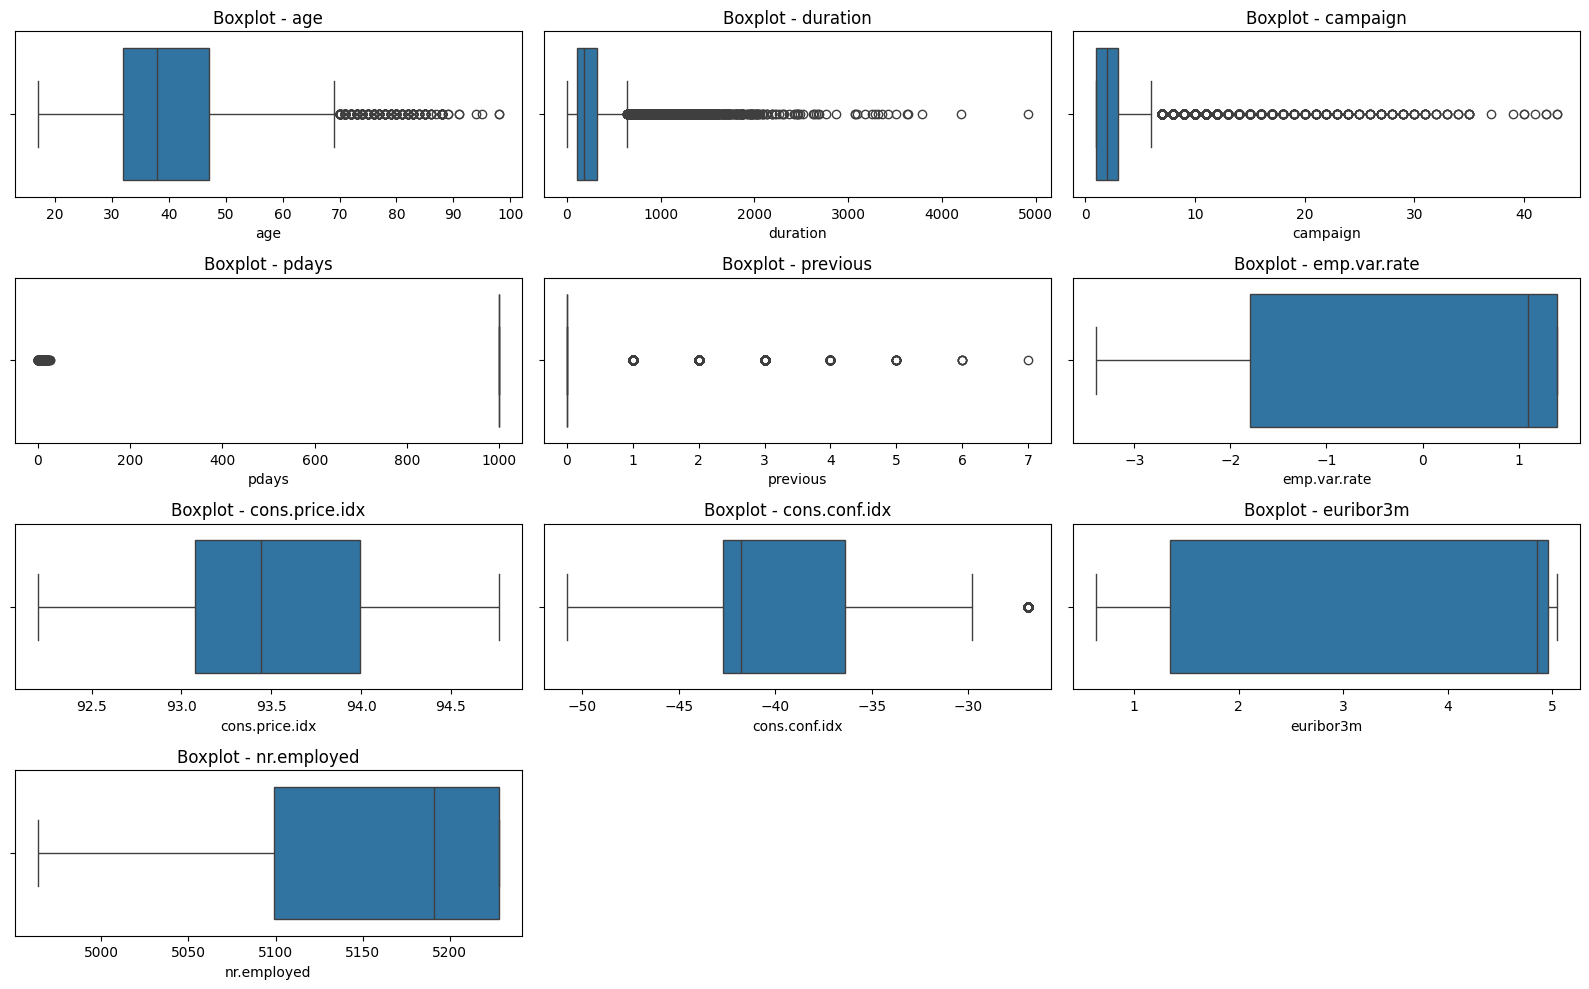

In [18]:
col_names = list(df.select_dtypes(include='number').columns)
iterPlt = 1
plt.figure(figsize=(16,10))

for col in col_names:
    plt.subplot(4,3, iterPlt)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

    iterPlt += 1

Outliers of Client description like `age` will not be deleted because the feature describes the client directly. Then, campaign description values such as `duration` and `campaign` are still reasonable due to the values outside of the IQR whiskers are still  clumped closely instead of certain extreme outliers. On the other hand, `pdays` and `previous` are integers describing days and number of times respectively which both have extreme skewness but the values causing them indicate special meanings. Value of 999 in `pdays` means the client was not previously contacted, while the value 0 in `previous` also means there was no prior contact. Lastly, the features related to socio-economic conditions have no extreme outliers and the values describe the actual condition when the campaign call was made for the specific client and are based on external data from the central bank of the Portuguese Republic statistical website.

## D. Data Analysis

**Visualizing The Target**

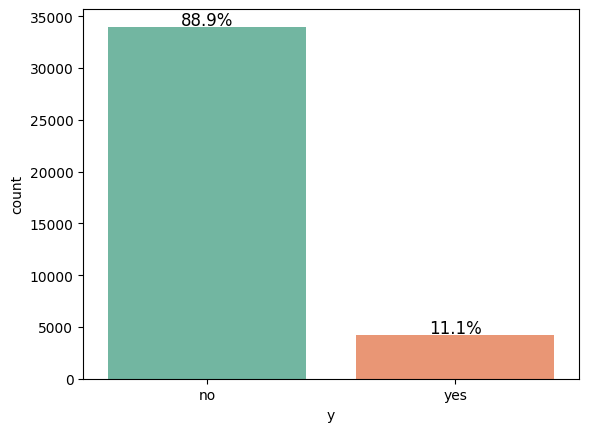

In [19]:
sns.countplot(data=df, x='y',palette='Set2')
total = len(df)

# add percentage
# Menambahkan persentase di atas setiap batang
for p in plt.gca().patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')
    
plt.show()

**check proportion of all catagorical feature towards the target**

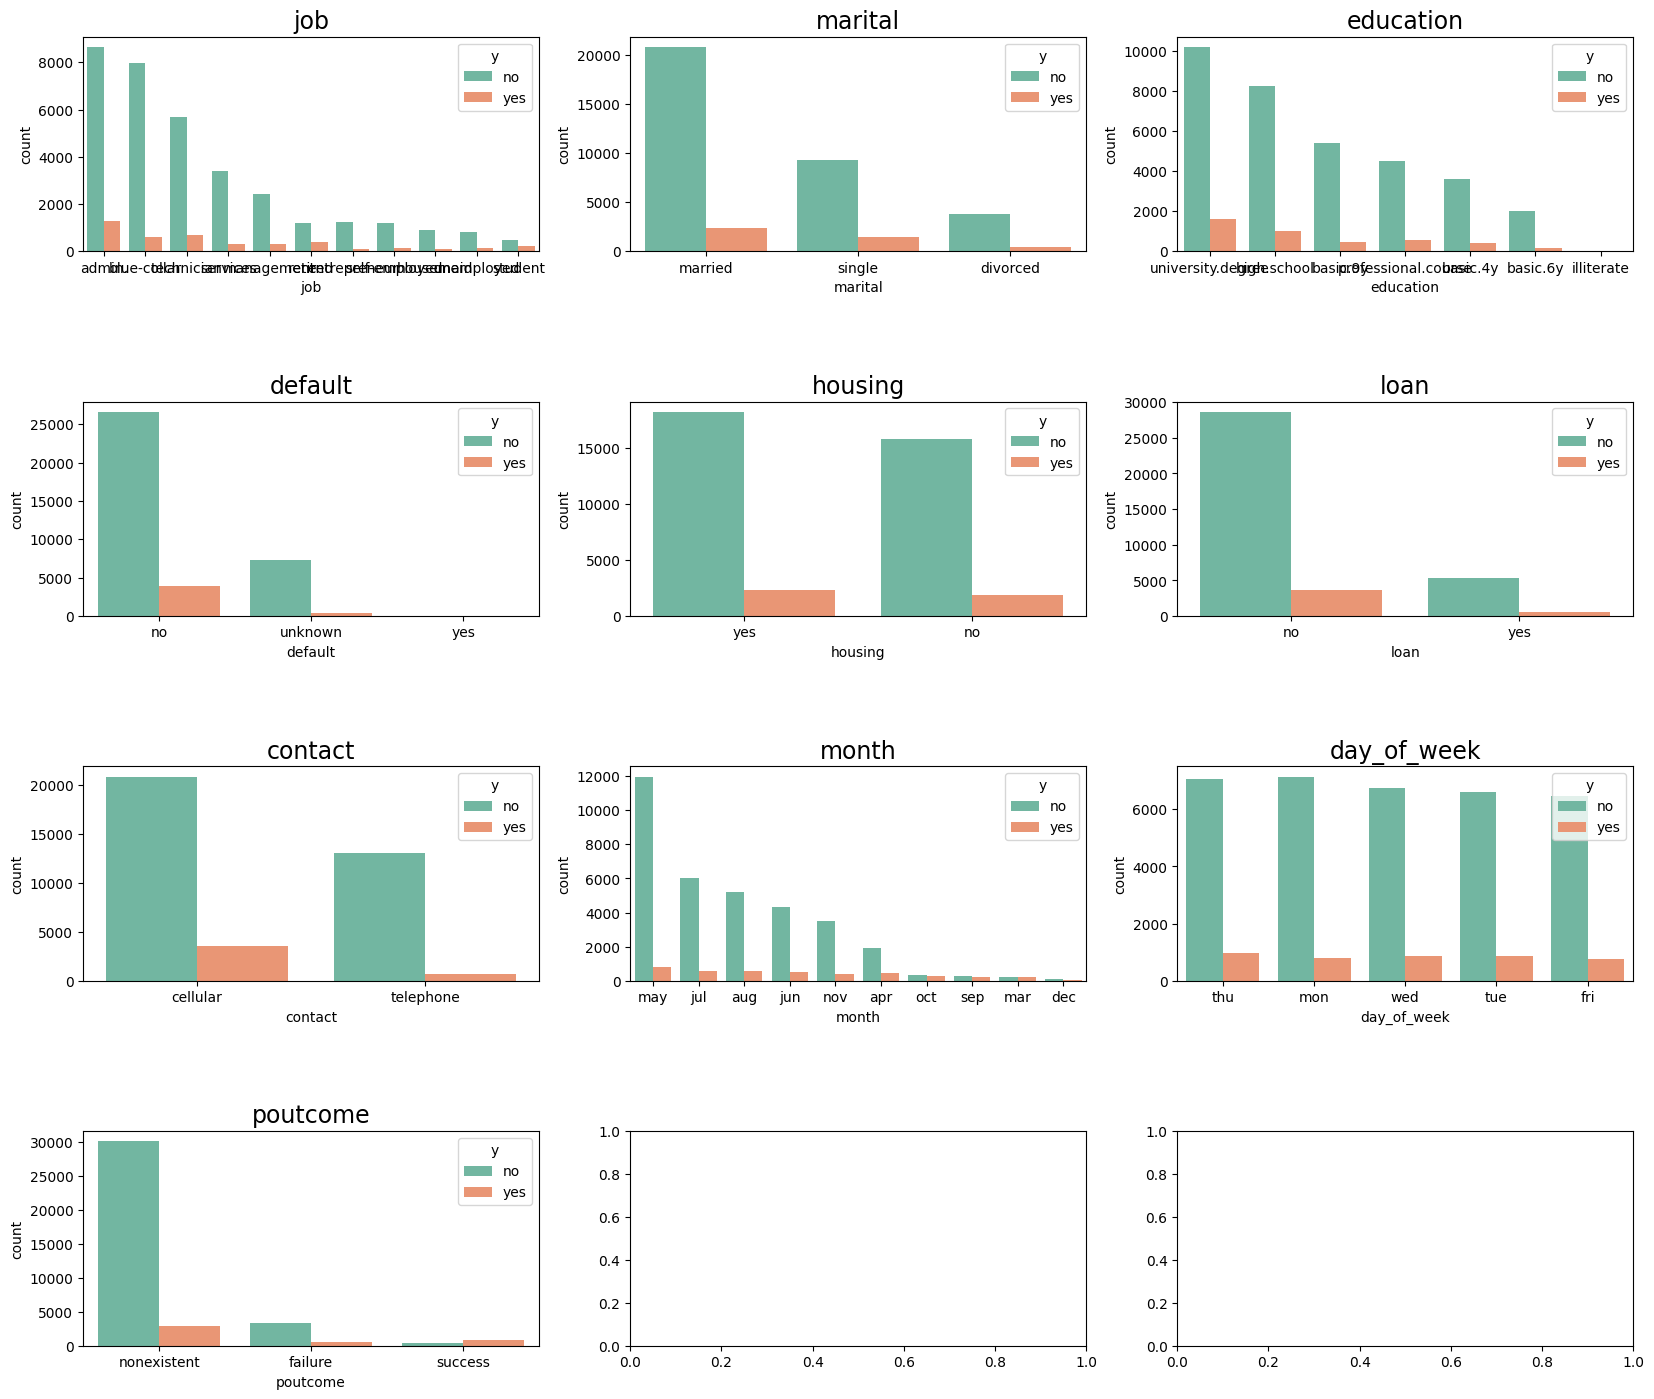

In [20]:
catagorical_features = df.select_dtypes('object').columns.to_list()
catagorical_features = catagorical_features[:-1]

fig, ax = plt.subplots(4,3, figsize=(20,17))

catagorical_features = df.select_dtypes('object').columns.to_list()
catagorical_features = catagorical_features[:-1]

ax = ax.ravel()
position = 0

for i in catagorical_features:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='Set2', order=order)
    ax[position].tick_params()
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

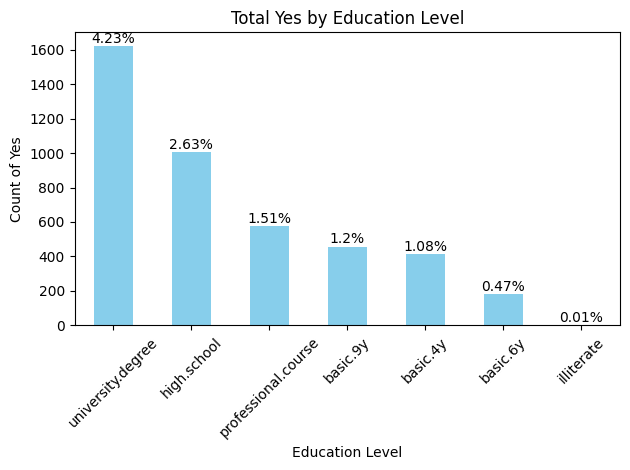

In [57]:
yes_counts = df[df['y'] == 'yes'].groupby('education').size()
total_data = len(df)
#total_yes = yes_counts.sum()

# 'yes'percentage on each 'education' catagory
percent_yes = np.around((yes_counts / total_data) * 100, 2)
yes_counts_sorted = yes_counts.sort_values(ascending=False)

# Plotting bar plot
ax = yes_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Count of Yes')
plt.title('Total Yes by Education Level')
plt.xticks(rotation=45)

# percentage label
for i, v in enumerate(yes_counts_sorted):
    ax.text(i, v + 1, f'{percent_yes[yes_counts_sorted.index[i]]}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

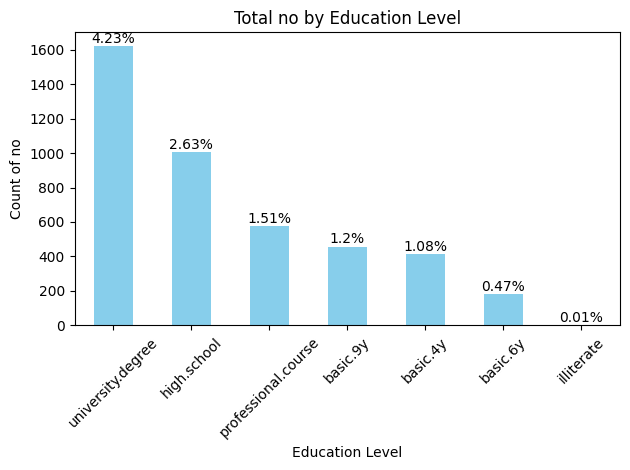

In [58]:
no_counts = df[df['y'] == 'no'].groupby('education').size()
total_data = len(df)
#total_no = no_counts.sum()

# 'no'percentage on each 'education' catagory
percent_no = np.around((no_counts / total_data) * 100, 2)
no_counts_sorted = yes_counts.sort_values(ascending=False)

# Plotting bar plot
ax = no_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Count of no')
plt.title('Total no by Education Level')
plt.xticks(rotation=45)

# percentage label
for i, v in enumerate(yes_counts_sorted):
    ax.text(i, v + 1, f'{percent_yes[yes_counts_sorted.index[i]]}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [61]:
# Menghitung jumlah properti berdasarkan room_type
default_counts = df['default'].value_counts()

# Membuat label untuk pie chart
explode_1 = (0.1, 0.1, 0.3, 0.1)
labels = [f"{default}\n{count}" for room_type, count in zip(default_counts.index, default_counts)]

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', explode=explode_1, startangle=140)
plt.title('Persentase Jenis Kamar Seluruh Properti', size=15)
plt.axis('equal')
plt.show()

NameError: name 'default' is not defined

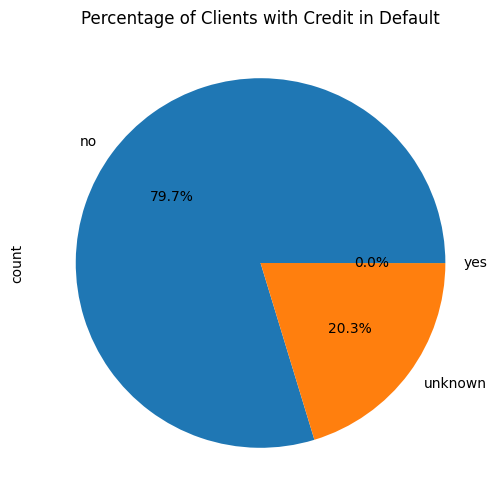

In [59]:
plt.figure(figsize=(6, 6))
df['default'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Clients with Credit in Default')
plt.show()

**check the numerical data**

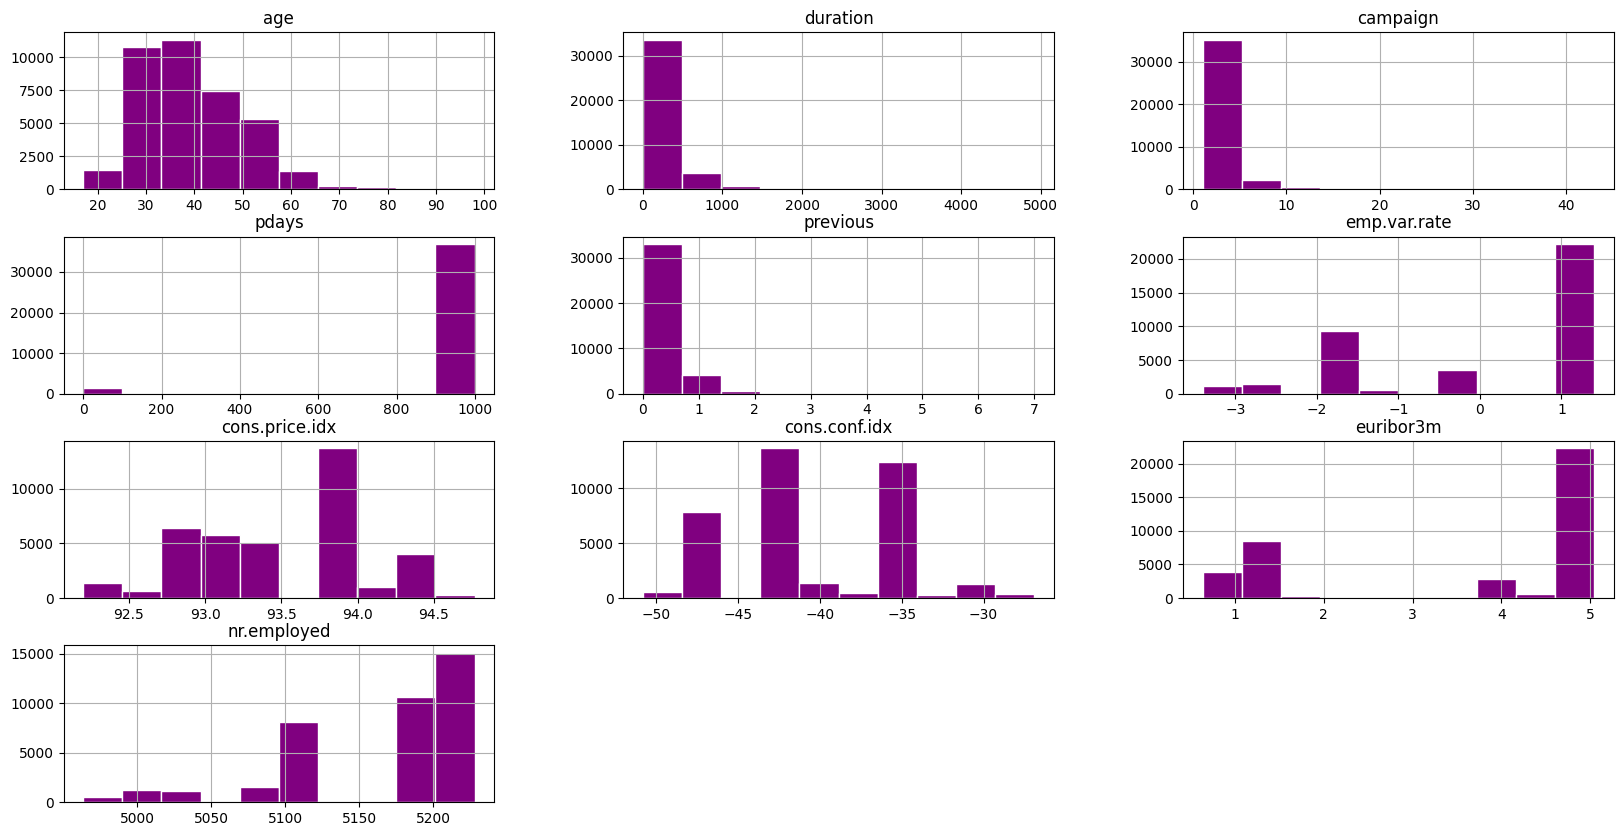

In [21]:
numerical_features = df.select_dtypes(['int64', 'float64']).columns.to_list()

df.hist(figsize=(20,10), edgecolor='white', color='purple')
plt.show()

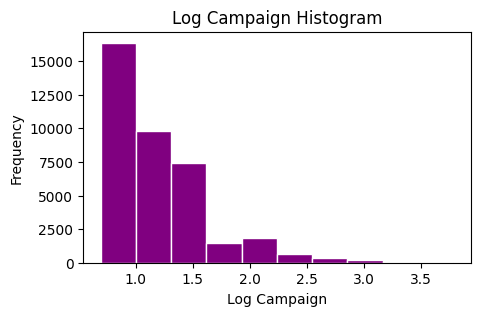

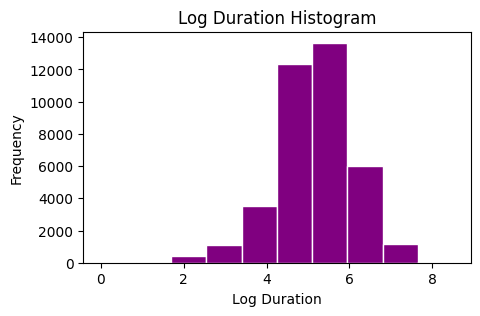

In [22]:
# log transformation
Log_campaign = np.log(df['campaign'] + 1)
Log_duration = np.log(df['duration'] + 1)

# plot for Log_campaign
plt.figure(figsize=(5, 3))
plt.hist(Log_campaign, edgecolor='white', color='purple')
plt.title('Log Campaign Histogram')
plt.xlabel('Log Campaign')
plt.ylabel('Frequency')
plt.show()

# plot for Log_duration
plt.figure(figsize=(5, 3))
plt.hist(Log_duration, edgecolor='white', color='purple')
plt.title('Log Duration Histogram')
plt.xlabel('Log Duration')
plt.ylabel('Frequency')
plt.show()

**check the temporal data**

In [23]:
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month'] = df['month'].astype('int')

In [24]:
d = {'thu':4, 'mon':1, 'wed':3, 'tue':2, 'fri':5}
df['day_of_week'] = df['day_of_week'].map(d)
df['day_of_week'] = df['day_of_week'].astype('int')

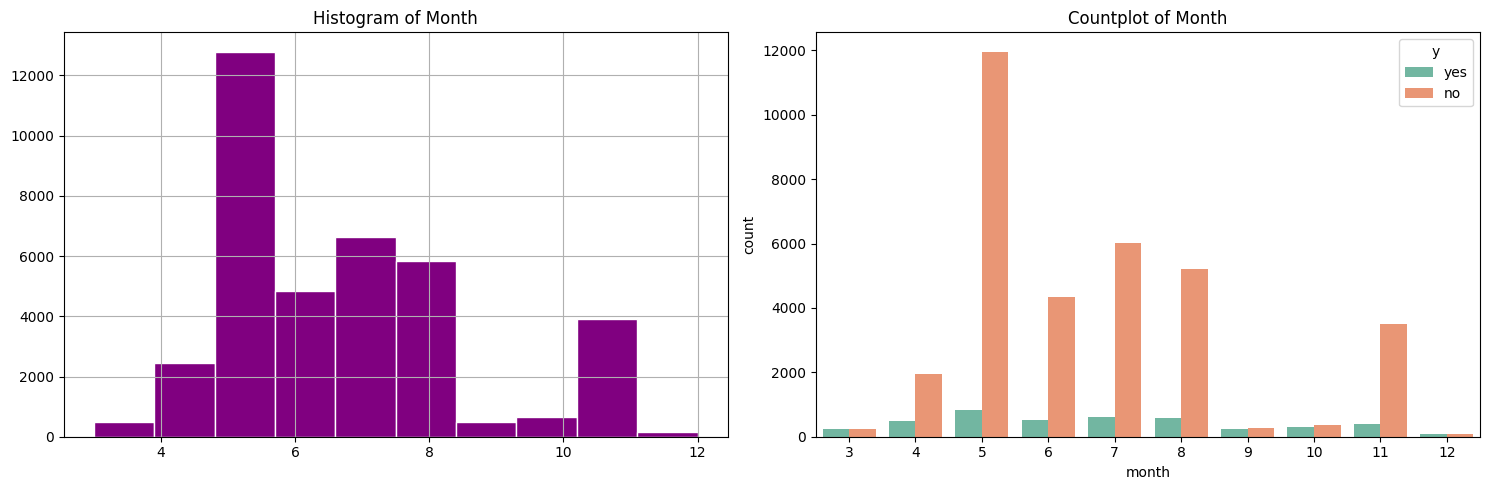

In [28]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

df.hist(column='month', edgecolor='white', color='purple', ax=ax[0]) # the first subplot in fig, ax.
ax[0].set_title('Histogram of Month')


sns.countplot(data=df, x='month', hue='y', palette='Set2', ax=ax[1])
ax[1].set_title('Countplot of Month')

plt.tight_layout()
plt.show()


In [40]:
# calculate data each month dan persentase
count_data = df['month'].value_counts().sort_index()
total_count = count_data.sum()
percent_data = np.around(count_data / total_count * 100, 2)

yes_data = df[df['y'] == 'yes'].groupby('month').size().reindex(count_data.index, fill_value=0)
percent_yes = np.around(yes_data / count_data * 100, 2)

# Menyusun data ke dalam bentuk dataframe
table_data = pd.DataFrame({
    'Total Count': count_data,
    '% of Total': percent_data,
    'Yes Count': yes_data,
    '% of Yes': percent_yes
})

# Menampilkan dataframe
display(table_data)

,Total Count,% of Total,Yes Count,% of Yes
month,,,,
3,497,1.30,252,50.70
4,2435,6.37,486,19.96
5,12792,33.46,830,6.49
6,4846,12.67,511,10.54
7,6626,17.33,598,9.03
8,5820,15.22,596,10.24
9,502,1.31,225,44.82
10,658,1.72,297,45.14
11,3897,10.19,385,9.88


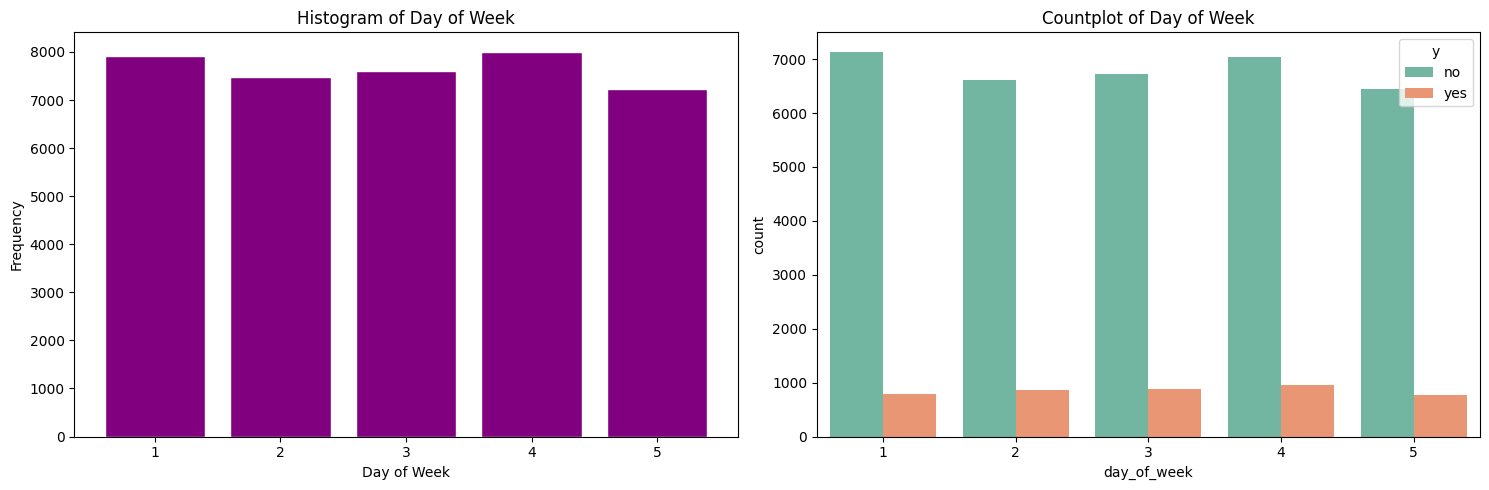

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Menghitung jumlah frekuensi untuk setiap kategori 'day_of_week'
counts = df['day_of_week'].value_counts().sort_index()

# Plot bar plot untuk kolom 'day_of_week'
ax[0].bar(counts.index, counts.values, edgecolor='white', color='purple')
ax[0].set_title('Histogram of Day of Week')
ax[0].set_xlabel('Day of Week')
ax[0].set_ylabel('Frequency')

# Menggambar countplot menggunakan seaborn
sns.countplot(data=df, x='day_of_week', hue='y', palette='Set2', ax=ax[1])
ax[1].set_title('Countplot of Day of Week')

plt.tight_layout()
plt.show()

**Correlation**

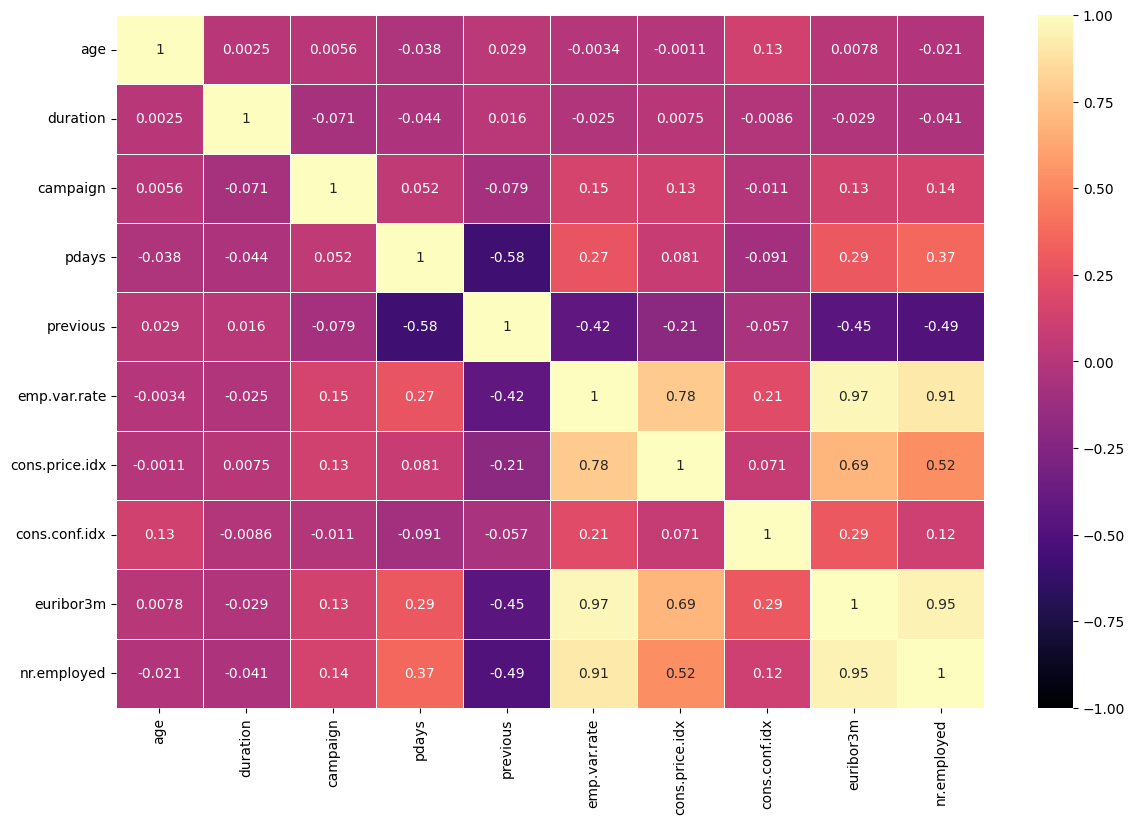

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df[numerical_features].corr(), vmin=-1, vmax=1, cmap='magma', annot=True, linewidths=.5)
plt.show()

In [ ]:
display(df[numerical_features].describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.000000,38234.00000,38234.000000,38234.000000,38234.000000
mean,39.860438,258.236282,2.566930,963.521447,0.170058,0.082934,93.57038,-40.541515,3.623337,5167.433156
std,10.288704,259.818894,2.767777,184.320782,0.487231,1.565854,0.57636,4.622785,1.730204,71.759739
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.20100,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.07500,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.44400,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.99400,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.76700,-26.900000,5.045000,5228.100000


## E. Data Preparation 

### Checking Imbalance

In [ ]:
df['y'].value_counts()

y
no     33977
yes     4257
Name: count, dtype: int64

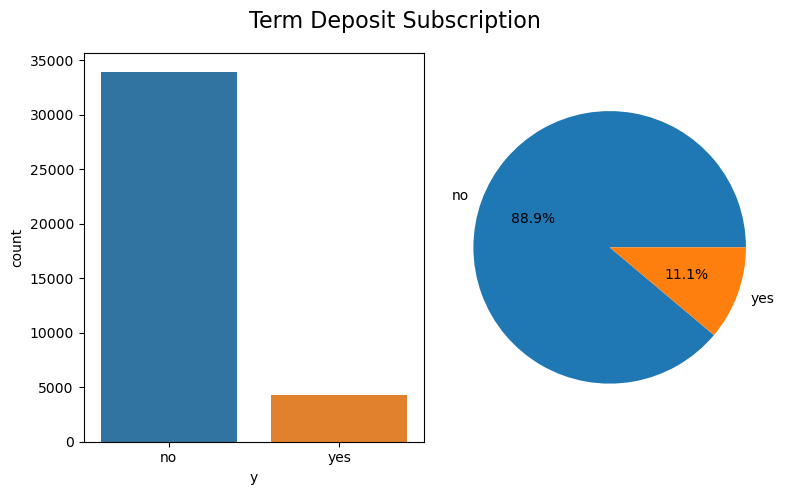

In [ ]:
plt.figure(figsize=(8,5)).suptitle('Term Deposit Subscription', fontsize=16)

plt.subplot(1,2,1)
sns.countplot(data=df, x='y')

plt.subplot(1,2,2)
plt.pie(df['y'].value_counts(), labels=['no','yes'], autopct='%.1f%%')

plt.tight_layout()
plt.show()  

It is evident that the dataset is imbalanced based on the target variable for this classification task, which is Term Deposit Subscription. The proportion of Term Deposit Subscription as the minority class `yes` is only 11.1%, indicating that the dataset is moderately imbalanced (1-20% of the dataset) [1]. In order to address the imbalance, resampling techniques are typically used. Based on Google Developers recommendation, Downsampling and Upweighting would be utilized.

Source: 

[1] [Google Developers: Handling Imbalanced Data](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

### Feature Engineering

**Feature**
1. `age`: Use RobustScaler to handle outliers and spread data.
2. `job`: Custom ordinal encoding due to many categories (>5) and having specific ranking based on financial stability and how high-paying the job is.
3. `marital`: One Hot Encoding for the 4 categorical values.
4. `education`: Custom ordinal encoding for the 8 categorical values which also describe education level which favors education level with more closely related to professional setting in business or industry.
5. `default`: One Hot Encoding for the 3 categorical values.
6. `housing`: One Hot Encoding for the 2 categorical values.
7. `loan`: One Hot Encoding for the 2 categorical values.
8. `contact`: One Hot Encoding for the 2 categorical values.
9. `month`: Cyclical nature of this feature could be represented by making sine and cosine of numerical representation of the month.
10. `day_of_week`: Cyclical nature of this feature could be represented by making sine and cosine of numerical representation of the day of the week.
11. `duration`: RobustScaler to handle outliers and spread data.
12. `campaign`: RobustScaler to handle outliers and spread data.
13. `pdays`: Binning is done to handle the value 999 that signify no prior contact had been made.
14. `previous`: RobustScaler to handle outliers and spread data.
15. `poutcome`: One Hot Encoding for the 3 categorical values.
16. `emp.var.rate`: RobustScaler to handle outliers and spread data.
17. `cons.price.idx`: RobustScaler to handle outliers and spread data.
18. `cons.conf.idx`: RobustScaler to handle outliers and spread data.
19. `euribor3m`: RobustScaler to handle outliers and spread data.
20. `nr.employed`: RobustScaler to handle outliers and spread data.

**Target**
1. `y`: Encoding not needed, already in binary format.

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Custom ordinal 1 - job

In [ ]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

**Estimated Average Salaries for Job Types in Portugal :**

1. **Housemaid** : 
   - Average Salary of €10,000 - €12,000 annually.
   
2. **Services (e.g. Customer Service)** :
   - Average Salary of €22,335 annually.

3. **Admin.** :
   - Average Salary of €17,000 - €20,000 annually.

4. **Technician** :
   - Average Salary of €18,000 - €25,000 annually, depending on the specialization.

5. **Blue-Collar (e.g. Construction Worker)** :
   - Average Salary of €25,038 annually.

6. **Retired** :
   - Average Retirement Pension: Approximately €7,000 annually.

7. **Management (e.g. Manager, Business Partner)** :
   - Average Salary of €37,073 annually.

8. **Unemployed** :
   - For standard case of previous monthly salary of €900 who is single and has no children, monthly unemployment benefit of €626.85 is entitled with certain government requirements.

9. **Self-Employed** :
   - Varies widely, with typical earnings around €1,200 - €1,500 monthly, depending on the business.

10. **Entrepreneur (Small and Medium Enterprises - SME)** :
    - Average Revenue: Highly variable but can be around €20,000 - €50,000 annually for small businesses.

11. **Student (Part-time job)** :
    - Average Salary of €5.13 per hour, leading to approximately €410 monthly for part-time work.

Sources:
1. [SalaryExpert](https://www.salaryexpert.com/salary/job/)
2. [TimeCamp](https://www.timecamp.com/average-salary/portugal/)
3. [expatica](https://www.expatica.com/pt/working/employment-law/minimum-wage-in-portugal-927429/)
4. [salaryexplorer](https://www.salaryexplorer.com/average-salary-wage-comparison-portugal-c174)
5. [eportugal.gov](https://eportugal.gov.pt/en-GB/servicos/requerer-o-subsidio-de-desemprego)


| No. | Job Type                               | Monthly Compensation (€) | Stability    |
|-----|----------------------------------------|--------------------------|--------------|
| 1   | Housemaid                              | €833 - €1,000             | Stable       |
| 2   | Services (e.g. Customer Service)       | €1,861                    | Stable       |
| 3   | Admin.                                 | €1,417 - €1,667           | Stable       |
| 4   | Technician                             | €1,500 - €2,083           | Stable       |
| 5   | Blue-Collar (e.g. Construction Worker) | €2,086                    | Stable       |
| 6   | Retired                                | €583                      | Stable       |
| 7   | Management (e.g. Manager, Business Partner) | €3,089            | Stable       |
| 8   | Unemployed                             | €626.85                   | Unstable     |
| 9   | Self-Employed                          | €1,200 - €1,500           | Moderate     |
| 10  | Entrepreneur (Small and Medium Enterprises - SME) | €1,667 - €4,167 | Moderate     |
| 11  | Student (Part-time job)                | Approx. €410              | Unstable     |

In [ ]:
dataSalary = {
    "job": [
        "housemaid", "services", "admin.",
        "technician", "blue-collar", "retired",
        "management", "unemployed", "self-employed",
        "entrepreneur", "student"
    ],
    "compensation": [
        (833 + 1000) / 2, 1861, (1417 + 1667) / 2, (1500 + 2083) / 2, 2086, 583, 3089, 626.85, (1200 + 1500) / 2, (1667 + 4167) / 2, 410
    ],
    "stability": [
        "stable", "stable", "stable", "stable", "stable", "stable",
        "stable", "unstable", "moderate", "moderate", "unstable"
    ]
}

# Create DataFrame
dfSalary = pd.DataFrame(dataSalary)
display(dfSalary)

# Encode stability as ordinal values
stability_mapping = {
    'stable': 1,
    'moderate': 2,
    'unstable': 3
}
dfSalary['stability'] = dfSalary['stability'].map(stability_mapping)

# Round to closest 500 hundreds multiple
dfSalary['compensation'] = dfSalary['compensation'].apply(lambda x: round(x / 500) * 500)

# Sort by compensation and stability
print('Rounded and Sorted compensation with encoded stability:')
dfSalarySorted = dfSalary.sort_values(by=['compensation','stability'], ascending=[True,True])
display(dfSalarySorted)

,job,compensation,stability
0,housemaid,916.50,stable
1,services,1861.00,stable
2,admin.,1542.00,stable
3,technician,1791.50,stable
4,blue-collar,2086.00,stable
5,retired,583.00,stable
6,management,3089.00,stable
7,unemployed,626.85,unstable
8,self-employed,1350.00,moderate
9,entrepreneur,2917.00,moderate


Rounded and Sorted compensation with encoded stability:


,job,compensation,stability
5,retired,500,1
7,unemployed,500,3
10,student,500,3
0,housemaid,1000,1
2,admin.,1500,1
8,self-employed,1500,2
1,services,2000,1
3,technician,2000,1
4,blue-collar,2000,1
6,management,3000,1


In [ ]:
# Initialize rank tracking
rank = 0
current_comp_stab = None
ordinal_rank = []

# Assign ordinal rank based on sorted order and same values
for i, row in dfSalarySorted.iterrows():
    if (row['compensation'], row['stability']) != current_comp_stab:
        rank += 1
        current_comp_stab = (row['compensation'], row['stability'])
    ordinal_rank.append(rank)

# Add ordinal rank to the DataFrame
dfSalarySorted['ordinal'] = ordinal_rank
dfSalarySorted

,job,compensation,stability,ordinal
5,retired,500,1,1
7,unemployed,500,3,2
10,student,500,3,2
0,housemaid,1000,1,3
2,admin.,1500,1,4
8,self-employed,1500,2,5
1,services,2000,1,6
3,technician,2000,1,6
4,blue-collar,2000,1,6
6,management,3000,1,7


In [ ]:
# Dropping the compensation and stability and making it into dictionary
dictSalary = dfSalarySorted.drop(columns=["compensation","stability"]).to_dict(orient='list')

# Convert to ordinal mapping dictionary
salary_ordinal_mapping = {job: ordinal for job, ordinal in zip(dictSalary['job'], dictSalary['ordinal'])}
salary_ordinal_mapping

{'retired': 1,
 'unemployed': 2,
 'student': 2,
 'housemaid': 3,
 'admin.': 4,
 'self-employed': 5,
 'services': 6,
 'technician': 6,
 'blue-collar': 6,
 'management': 7,
 'entrepreneur': 8}

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class JobOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping):
        self.mapping = mapping
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        X['job'] = X['job'].map(self.mapping)
        return X


Testing into pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
Pipeline([
    ('job_encoder', JobOrdinalEncoder(mapping=salary_ordinal_mapping))
])

Pipeline(steps=[('job_encoder',
                 JobOrdinalEncoder(mapping={'admin.': 4, 'blue-collar': 6,
                                            'entrepreneur': 8, 'housemaid': 3,
                                            'management': 7, 'retired': 1,
                                            'self-employed': 5, 'services': 6,
                                            'student': 2, 'technician': 6,
                                            'unemployed': 2}))])

#### Custom ordinal 2 - education

In [ ]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

The ordinal representation would be determined based on the education level and its relation to **professional expertise**, **business**, or **industry**.

In [ ]:
dfEdu = pd.DataFrame({
    'education': list(df['education'].unique()),
    'ordinal': [2,5,3,4,7,6,1]
})
dfEdu.sort_values(by=['ordinal'], ascending=[True])

,education,ordinal
6,illiterate,1
0,basic.4y,2
2,basic.6y,3
3,basic.9y,4
1,high.school,5
5,university.degree,6
4,professional.course,7


In [ ]:
edu_ordinal_mapping = {edu: ordinal for edu, ordinal in zip(dfEdu['education'], dfEdu['ordinal'])}
edu_ordinal_mapping

{'basic.4y': 2,
 'high.school': 5,
 'basic.6y': 3,
 'basic.9y': 4,
 'professional.course': 7,
 'university.degree': 6,
 'illiterate': 1}

In [ ]:
class EduOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping):
        self.mapping = mapping
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        X['education'] = X['education'].map(self.mapping)
        return X


Testing into pipeline

In [ ]:
Pipeline([
    ('edu_encoder', EduOrdinalEncoder(mapping=salary_ordinal_mapping))
])

Pipeline(steps=[('edu_encoder',
                 EduOrdinalEncoder(mapping={'admin.': 4, 'blue-collar': 6,
                                            'entrepreneur': 8, 'housemaid': 3,
                                            'management': 7, 'retired': 1,
                                            'self-employed': 5, 'services': 6,
                                            'student': 2, 'technician': 6,
                                            'unemployed': 2}))])

#### Cyclical

1. month


In [ ]:
dfMonth = pd.DataFrame({
    'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
})

# Convert month names to numerical values
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
dfMonth['month_num'] = dfMonth['month'].map(month_map)

# Apply sine and cosine transformations
dfMonth['month_sin'] = np.sin(2 * np.pi * dfMonth['month_num'] / 12)
dfMonth['month_cos'] = np.cos(2 * np.pi * dfMonth['month_num'] / 12)

# Drop the original month_num column if not needed
dfMonth.drop(columns=['month_num'])

,month,month_sin,month_cos
0,jan,5.000000e-01,8.660254e-01
1,feb,8.660254e-01,5.000000e-01
2,mar,1.000000e+00,6.123234e-17
3,apr,8.660254e-01,-5.000000e-01
4,may,5.000000e-01,-8.660254e-01
5,jun,1.224647e-16,-1.000000e+00
6,jul,-5.000000e-01,-8.660254e-01
7,aug,-8.660254e-01,-5.000000e-01
8,sep,-1.000000e+00,-1.836970e-16
9,oct,-8.660254e-01,5.000000e-01


In [ ]:
class CyclicalMonthTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, period):
        self.period = period

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X_sin = np.sin(2 * np.pi * X / self.period)
        X_cos = np.cos(2 * np.pi * X / self.period)
        return np.hstack([X_sin, X_cos])

# Example usage with months of the year
dfMonth = pd.DataFrame({
    'month_num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Assuming months are encoded as 1 (Jan) to 12 (Dec)
})

# Create an instance of the transformer for a yearly period (12 months)
month_transformer = CyclicalMonthTransformer(period=12)
month_transformer

CyclicalMonthTransformer(period=12)

2. day_of_week

In [ ]:
dfWeek = pd.DataFrame({
    'day': ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
})

# Convert day names to numerical values
day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
dfWeek['day_num'] = dfWeek['day'].map(day_map)

# Apply sine and cosine transformations
dfWeek['day_sin'] = np.sin(2 * np.pi * dfWeek['day_num'] / 7)
dfWeek['day_cos'] = np.cos(2 * np.pi * dfWeek['day_num'] / 7)

# Drop the original day_num column if not needed
dfWeek.drop(columns=['day_num'])

,day,day_sin,day_cos
0,mon,7.818315e-01,0.623490
1,tue,9.749279e-01,-0.222521
2,wed,4.338837e-01,-0.900969
3,thu,-4.338837e-01,-0.900969
4,fri,-9.749279e-01,-0.222521
5,sat,-7.818315e-01,0.623490
6,sun,-2.449294e-16,1.000000


In [ ]:
class CyclicalDayWeekTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, period):
        self.period = period

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X_sin = np.sin(2 * np.pi * X / self.period)
        X_cos = np.cos(2 * np.pi * X / self.period)
        return np.hstack([X_sin, X_cos])

# Example usage with days of the week
dfWeek = pd.DataFrame({
    'day_num': [1, 2, 3, 4, 5, 6, 7]  # Assuming days are encoded as 1 (Mon) to 7 (Sun)
})

# Create an instance of the transformer for a weekly period (7 days)
day_week_transformer = CyclicalDayWeekTransformer(period=7)
day_week_transformer

CyclicalDayWeekTransformer(period=7)

#### Binning

1. duration
2. pdays

Text(0.5, 0.98, 'Distribution of duration and pdays')

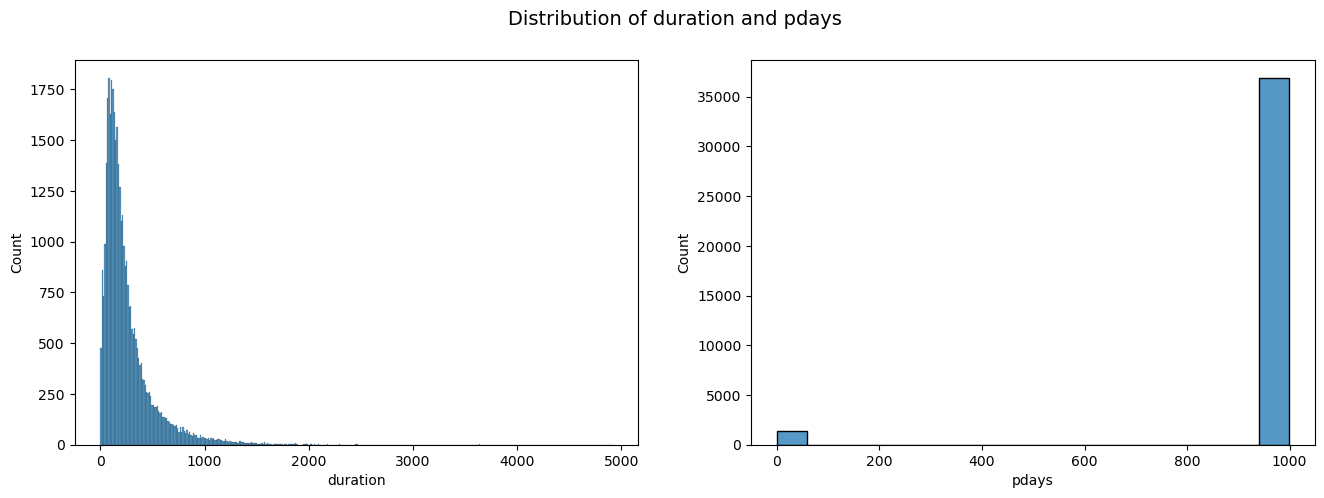

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='duration')
plt.subplot(1,2,2)
sns.histplot(data=df, x='pdays')

plt.suptitle('Distribution of duration and pdays', size= 14)

In [ ]:
df.describe()[['duration','pdays']]

,duration,pdays
count,38234.000000,38234.000000
mean,258.236282,963.521447
std,259.818894,184.320782
min,0.000000,0.000000
25%,102.000000,999.000000
50%,180.000000,999.000000
75%,319.000000,999.000000
max,4918.000000,999.000000


In [ ]:
a = set(df[df['pdays'] < 900]['pdays'])
print(a)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 27}


Binning with custom bin edges. 

For `duration` 0-300 s (0-5 mins), 300-1800 s (5-30 mins), >30 mins.

For `pdays` 0-7 days, 1-2 weeks, >2 weeks.


In [ ]:
bins1 = pd.cut(df['duration'], bins=[0, 300, 1800, df['duration'].max()], labels=False)
bins2 = pd.cut(df['pdays'], bins=[-1, 7, 14, df['pdays'].max()], labels=False) # -1 is only for including 0

In [ ]:
display(bins1.value_counts(), bins2.value_counts())

duration
0.0    27833
1.0    10301
2.0       96
Name: count, dtype: int64

pdays
2    36920
0     1071
1      243
Name: count, dtype: int64

Hasil binning sudah ordinal

In [ ]:
df['duration_bin'] = bins1
df['pdays_bin'] = bins2

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_bin,pdays_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,2
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,2


**Encoders dan Scalers**

In [ ]:
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['Tenure','WarehouseToHome','CashbackAmount']),
    ('binary', ce.BinaryEncoder(), ['PreferedOrderCat']),
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus'])
], remainder='passthrough')

In [ ]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'CashbackAmount']),
                                ('binary', BinaryEncoder(),
                                 ['PreferedOrderCat']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['MaritalStatus'])])

### Data Splitting

In [ ]:
x = df.drop(columns=['y'])
y = df['y']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split( x, y, stratify=y, test_size=0.2, random_state=2024)

In [ ]:
testing = pd.DataFrame(transformer.fit_transform(x_train), columns=transformer.get_feature_names_out())
testing.head()

,scaler__Tenure,scaler__WarehouseToHome,scaler__CashbackAmount,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__DaySinceLastOrder
0,0.000000,1.333333,-0.817515,0.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0
1,0.000000,0.190476,-0.854765,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
2,-0.250000,0.952381,2.191401,0.0,1.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0
3,0.083333,0.000000,-0.804042,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0
4,1.000000,-0.571429,2.354072,0.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0,0.0,0.0


## F. Modeling and Evaluation

In [ ]:
# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay # deprec: plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler


In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 123456)
rf = RandomForestClassifier(random_state = 123456)
xgb = XGBClassifier(random_state = 123456)
lgbm = lgb.LGBMClassifier(random_state = 123456)

### Model Benchmarking : K-Fold

In [ ]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
meanROC=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    meanROC.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':meanROC,'std':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 342, number of negative: 1750
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163480 -> initscore=-1.632560
[LightGBM] [Info] Start training from score -1.632560
[LightGBM] [Info] Number of positive: 342, number of negative: 1750
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163480 -> initscore=-1.632560
[LightGBM] [

,mean roc_auc,std
model,,
Random Forest,0.923275,0.010190
LightGBM,0.922073,0.009626
XGBoost,0.917523,0.008245
Logistic Regression,0.869068,0.021625
KNN,0.828856,0.008872
Decision Tree,0.781184,0.018700


Seperti terlihat di atas, performa training model Random Forest adalah terbaik dilihat dari metric utama roc_auc diikuti dengan LightGBM yang walaupun hanya roc_auc kedua namun karena perbedaan roc_auc juga sedikit dan mempunyai standard deviasi paling kecil sehingga menjadi yang terbaik jika dibandingkan dengan semua model benchmark yang menggunakan default hyperparameter masing-masing.

1. LightGBM
2. Random Forest

In [ ]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       547
           1       0.70      0.41      0.52       107

    accuracy                           0.87       654
   macro avg       0.80      0.69      0.72       654
weighted avg       0.86      0.87      0.86       654

KNN 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       547
           1       0.79      0.39      0.52       107

    accuracy                           0.88       654
   macro avg       0.84      0.69      0.73       654
weighted avg       0.88      0.88      0.87       654

Decision Tree 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       547
           1       0.62      0.65      0.64       107

    accuracy                           0.88       654
   macro avg       0.78      0.79      0.78       654
weighted avg       0.88      0

,roc_auc score
model,
LightGBM,0.942917
XGBoost,0.933332
Random Forest,0.933008
Logistic Regression,0.888243
KNN,0.853449
Decision Tree,0.788712


Konsisten dengan hasil interpretasi benchmark train, hasil test paling tinggi adalah LightGBM diikuti dengan kedua lainnya. Secara model ketiga model ini memang tetap berada di top 3, yang karena memang merupakan tree-based yang cukup advanced sehingga umum dalam mendapat hasil terbaik.

1. LightGBM
2. XGBoost
3. Random Forest

Mengingat data masih imbalance, perlu ditangani dengan oversampling. Namun, ada baiknya hasil dari evaluasi model perlu dilihat, karena oversampling dapat merubah statistik data secara keseluruhan. Selanjutnya, akan dicoba oversampling untuk model LightGBM kita untuk melihat apakah hasil yang lebih baik bisa diraih.

Dokumentasi : https://lightgbm.readthedocs.io/en/latest/

### Test Oversampling with K-Fold Cross Validation

In [ ]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)

    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state = 42)

In [ ]:
data = x_train
target = y_train

In [ ]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
    ros = RandomOverSampler(random_state = 123456) #SMOTE(random_state = 123456)

    # instantiate model 1
    estimator1=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    # instantiate model 2
    estimator2=Pipeline([
        ('preprocess',transformer),
        ('sampler',ros),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator1)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator2)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

[LightGBM] [Info] Number of positive: 384, number of negative: 1969
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 2353, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163196 -> initscore=-1.634639
[LightGBM] [Info] Start training from score -1.634639
[LightGBM] [Info] Number of positive: 1969, number of negative: 1969
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 3938, number of used features: 13
[LightGBM] [Info] [binary:B

#### Evaluation Metrics Without Oversampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_without_oversampling, validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],
                    tr['roc'],val['roc'],
                    tr['f1'],val['f1'],
                    tr['recall'],val['recall'],
                    tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 'Test Accuracy', 
                            'Train ROC AUC', 'Test ROC AUC', 
                            'Train F1 Score', 'Test F1 Score',
                            'Train Recall', 'Test Recall',
                            'Train Precision', 'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.992775,0.896947,0.999358,0.925879,0.986676,0.817280,0.968750,0.720930,0.986737,0.673913
1,0.990650,0.866412,0.999339,0.907508,0.982775,0.744447,0.963542,0.534884,0.978836,0.605263
2,0.988100,0.904580,0.998833,0.949665,0.978031,0.805494,0.953125,0.581395,0.973404,0.781250
3,0.990650,0.912214,0.999304,0.951258,0.982739,0.832065,0.960938,0.674419,0.981383,0.763158
4,0.989375,0.889313,0.999178,0.930551,0.980364,0.783871,0.955729,0.581395,0.978667,0.694444
5,0.985556,0.911877,0.999054,0.905197,0.973326,0.824807,0.942857,0.642857,0.968000,0.771429
6,0.988105,0.934866,0.998783,0.962818,0.978079,0.875787,0.953247,0.761905,0.973475,0.820513
7,0.987256,0.927203,0.998869,0.943683,0.976563,0.848705,0.953247,0.642857,0.968338,0.870968
8,0.988530,0.904215,0.998964,0.938980,0.978840,0.805369,0.955729,0.581395,0.973475,0.781250
9,0.989380,0.904215,0.998356,0.931619,0.980407,0.813555,0.958333,0.627907,0.976127,0.750000


#### Evaluation Metrics With Oversampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluateRos = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluateRos.index)
listIndex[-1] = 'Average'
dfEvaluateRos.index = listIndex
dfEvaluateRos

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.977901,0.885496,0.999237,0.933949,0.961602,0.811728,1.000000,0.790698,0.880734,0.618182
1,0.977901,0.854962,0.999081,0.913136,0.961528,0.765189,0.997396,0.720930,0.882488,0.543860
2,0.979601,0.912214,0.998740,0.941064,0.964210,0.841500,0.992188,0.744186,0.894366,0.727273
3,0.974076,0.916031,0.998617,0.948073,0.955257,0.859716,0.997396,0.860465,0.864560,0.698113
4,0.981725,0.904580,0.999226,0.931188,0.967844,0.833769,0.994792,0.767442,0.903073,0.687500
5,0.975361,0.892720,0.999336,0.903349,0.957421,0.812037,0.997403,0.738095,0.870748,0.645833
6,0.977485,0.934866,0.999024,0.952598,0.960829,0.886872,0.994805,0.880952,0.882488,0.755102
7,0.975361,0.915709,0.998536,0.931616,0.957421,0.846864,0.997403,0.761905,0.870748,0.727273
8,0.980459,0.908046,0.998829,0.944421,0.965771,0.829746,0.997396,0.697674,0.894860,0.731707
9,0.975361,0.881226,0.999096,0.935246,0.957421,0.806791,1.000000,0.790698,0.868778,0.607143


In [ ]:
print('Perubahan akibat oversampling :')
dfEvaluateRos.loc['Average'] - dfEvaluate.loc['Average']

Perubahan akibat oversampling :


Train Accuracy    -0.011515
Test Accuracy     -0.004599
Train ROC AUC     -0.000032
Test ROC AUC      -0.001252
Train F1 Score    -0.018850
Test F1 Score      0.014283
Train Recall       0.040328
Test Recall        0.140310
Train Precision   -0.094560
Test Precision    -0.077020
Name: Average, dtype: float64

Terdapat trade-off pada hasil evaluation metrics di atas antara precision dan recall dengan ROC AUC relatif sama. Dapat dilihat bahwa recall dari class positive meningkat dan lebih konsisten setelah dilakukan oversampling tetapi precisionnya sedikit memburuk. Hal ini dapat dimengerti karena class positive diperbanyak entri datanya menjadi sama dengan jumlah entri data dari class negative. Akibat dari perbanyakan data tersebut adalah recall dari class yg minoritas meningkat, tetapi sebaliknya precision juga menurun sebagai dampaknya. Lebih dalam lagi, dapat terlihat bahwa kemungkinan False Negative turun dan kemungkinan False Positive naik yang keduanya diakibatkan oleh makin banyaknya bobot data positive. 

Bertambahnya recall (+14.0%) lebih banyak dibandingkan precision yang turun (-7.7%). Ditinjau dalam konteks bisnis, dampak ini terhadap permasalahan bisnis berarti model setelah dilakukan oversampling dapat membantu perusahaan identifikasi customer yang berpotensi churn yang lebih banyak dari sebelumnya, tetapi berkurang dalam precision tebakan untuk customer churn yang dapat menyebabkan tambahan biaya promosi yang terbuang.

Sesuai dengan pembahasan di bagian awal, customer retention atau mempertahankan customer masih lebih penting dibanding alokasi anggaran untuk biaya promosi yang terbuang. Gambarannya, 1 customer jika gagal dipertahankan akan mengakibatkan loss atau kerugian yang lebih besar dari alokasi anggaran untuk biaya promosi untuk 1 orang customer tersebut jika ternyata False Positive. Oleh karena itu, False Negative yang terkait erat dengan recall menjadi lebih penting dan model yang dipakai adalah yang setelah oversampling.

#### Classification Reports Without Oversampling

In [ ]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       219
           1       0.67      0.72      0.70        43

    accuracy                           0.90       262
   macro avg       0.81      0.83      0.82       262
weighted avg       0.90      0.90      0.90       262

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       219
           1       0.61      0.53      0.57        43

    accuracy                           0.87       262
   macro avg       0.76      0.73      0.74       262
weighted avg       0.86      0.87      0.86       262

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       219
           1       0.78      0.58      0.67        43

    accuracy                           0.90       262
   macro avg       0.85      0.77      0.81       262
weighted avg       0.90      0.90      0.90       262

              preci

#### Classification Reports With Oversampling

In [ ]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       219
           1       0.62      0.79      0.69        43

    accuracy                           0.89       262
   macro avg       0.79      0.85      0.81       262
weighted avg       0.90      0.89      0.89       262

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       219
           1       0.54      0.72      0.62        43

    accuracy                           0.85       262
   macro avg       0.74      0.80      0.77       262
weighted avg       0.88      0.85      0.86       262

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       219
           1       0.73      0.74      0.74        43

    accuracy                           0.91       262
   macro avg       0.84      0.84      0.84       262
weighted avg       0.91      0.91      0.91       262

              preci

Setelah dilakukan oversampling recall dari kedua class churn (1) dan tidak churn (0) yang lebih seimbang. Hal ini menjadi pendukung tambahan untuk kasus ini, model dengan oversampling akan diterapkan

Tahap selanjutnya, hyperparameter tuning, akan dilakukan pada model LightGBM untuk optimasi hingga mendapatkan hasil yang lebih baik.

### Hyperparameter Tuning

Sumber :

1. https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
2. https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html

In [ ]:
# Assign ulang
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=123456)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

Randomized search 1 - hyperparameter yang dipilih manual

In [ ]:
hyperparam_space_gridCV=[{
    'model__num_leaves': [31, 21, 41, 51], # Semakin besar, semakin tinggi akurasi, bisa overfit
    'model__min_data_in_leaf': [20, 15, 35, 50], # Mencegah overfit

    'model__learning_rate': [0.1 ,0.01, 0.075, 0.125, 0.05], # Semakin kecil, semakin tinggi akurasi
    'model__num_iterations': [100, 75, 125, 150], # Semakin besar, semakin tinggi akurasi

    'model__max_bin': [255, 225, 275, 300], # Semakin besar, semakin tinggi akurasi, bisa memperlambat proses

    'model__random_state': [123456]
}]

Default hyperparameter LGBM : 
- `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.1

In [ ]:
gridSearch = RandomizedSearchCV(estimator, n_jobs=-1, param_distributions=hyperparam_space_gridCV, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123456))

In [ ]:
gridSearch.fit(x_train,y_train)
print(gridSearch.best_score_)
print(gridSearch.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 4376, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0.930197330492668
{'model__random_state': 123456, 'model__num_leaves': 41, 'model__num_iterations': 150, 'model__min_data_in_leaf': 15, 'model__max_bin': 300, 'model__learning_rate': 0.05}


Randomized Search 2 - hyperparameter dengan range dan interval tertentu

In [ ]:
hyperparam_space=[{
    'model__num_leaves': list(range(21,61,5)), # Semakin besar, semakin tinggi akurasi, bisa overfit
    'model__min_data_in_leaf': list(range(10,50,5)), # Mencegah overfit

    'model__learning_rate': list(np.round(np.arange(0.01, 0.2, 0.005), 3)), # Semakin kecil, semakin tinggi akurasi
    'model__num_iterations': list(range(25,275,25)), # Semakin besar, semakin tinggi akurasi

    'model__max_bin': [255] + list(range(200,325,25)), # Semakin besar, semakin tinggi akurasi, bisa memperlambat proses

    'model__lambda_l1': [[0]+list(np.logspace(-5, -1, 5, base=10))], # regularisasi L1 dan L2
    'model__lambda_l2': [0]+list(np.logspace(-5, -1, 5, base=10)),

    'model__random_state': [123456]
}]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(estimator, n_iter=100 ,n_jobs=-1, param_distributions=hyperparam_space, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123456))

In [ ]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of da

Hyperparameter LGBM yang paling baik setalah melakukan grid search maupun randomized search adalah:
- `num_leaves`: 46 
- `num_iterations`: 100 
- `min_data_in_leaf`: 25 
- `max_bin`: 225 
- `learning_rate`: 0.065 
- `lambda_l2`: 0 
- `lambda_l1`: 0

Pada hyperparameter `max_bin`, `lambda_l1`, `lambda_l1`, dan `num_iterations` default valuenya tetap yang terbaik. Untuk `num_leaves` bisa dicoba diperkecil lagi untuk mengurangi overfit dan dicoba di sekitar nilai terbaiknya 46. Begitu pula dengan hyperparameter lainnya, dapat dicoba di sekitar parameter terbaiknya untuk melihat peningkatan lebih lanjut jika mungkin.

In [ ]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of da

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=123456)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'CashbackAmount']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus'])])),
                ('model',
                 LGBMClassifier(lambda_l1=0, lambda_l2=0, learning_rate=0.065,
                                max_bin=225, min_data_in_leaf=25,
                                num_iterations=100, num_leaves=46,
                                random_state=123456))])

In [ ]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2188, number of negative: 2188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 4376, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=123456)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'CashbackAmount']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferedOrderCat']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus'])])),
                ('model', LGBMClassifier())])

In [ ]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
ROC AUC Score Default LGBM :  0.9366638760272684
ROC AUC Score Tuned LGBM :  0.94141365818654


Model LGBM setelah dilakukan tuning hyperparameter memiliki nilai metric utama ROC AUC yang lebih baik. Walaupun peningkatan sedikit, metode tuning lebih lanjut dan menggunakan metode lebih advanced mungkin dapat meningkatkan nilai tersebut tanpa overfit. Namun, adalah sangat umum untuk peningkatan hanya satu digit dalam hyperparameter tuning.

Perbandingan classification report dapat dilihat untuk meninjau lebih lanjut.

In [ ]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       547
           1       0.68      0.76      0.71       107

    accuracy                           0.90       654
   macro avg       0.81      0.84      0.83       654
weighted avg       0.91      0.90      0.90       654

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       547
           1       0.70      0.78      0.73       107

    accuracy                           0.91       654
   macro avg       0.83      0.85      0.84       654
weighted avg       0.91      0.91      0.91       654



Sama seperti sebelumnya, model LGBM setelah tuning memiliki classification report yang lebih baik walaupun hanya sedikit saja. Sekarang,  model yang telah ditune adalah model akhir yang didapat.

In [ ]:
import pickle
# save with pickle
pickle.dump(best_model, open('bestmodel_LightGBM.sav', 'wb'))

### Feature Importances

Tentu mengetahui fitur apa saja yang paling berpengaruh untuk model akhir LGBM adalah penting untuk menjawab analisa kita sebelumnya.

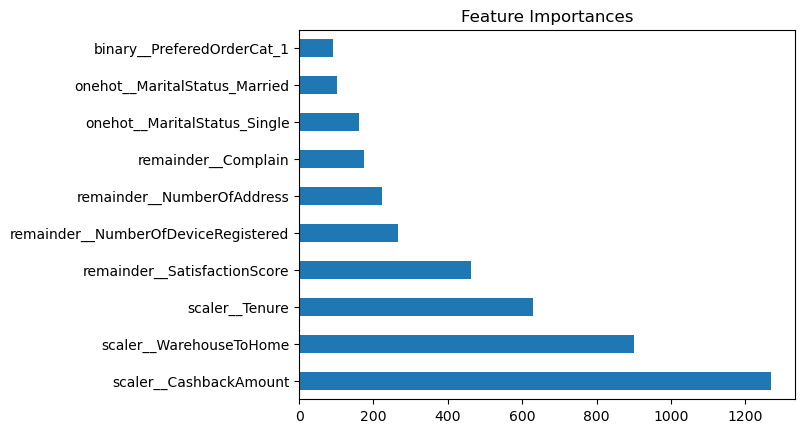

In [ ]:
coefFeat = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coefFeat.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan grafik tersebut, terlihat pada model LGBM akhir bahwa fitur `CashbackAmount` adalah yang paling signifikan, kemudian diikuti oleh `WarehouseToHome`, dan `Tenure`. Fitur lainnya memiliki importance yang cukup rendah, namun bukan berarti diabaikan, tapi hanya lebih fokus pada ketiga fitur penting yang terlihat.

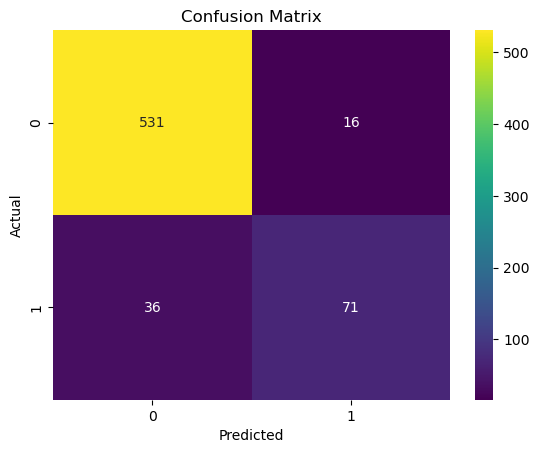

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()